In [1]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import os
os.getcwd()

'/gdrive'

In [4]:
os.chdir("MyDrive/Autism_code")
!pwd

/gdrive/MyDrive/Autism_code


In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_excel("Kinematics_autism.xlsx")

In [ ]:
#df=df.fillna(df.mean())

In [9]:
result = df.iloc[:, 102:]
result

Trunk_Angles_X_HS  Trunk_Angles_X_MAX_ST  Trunk_Angles_X_MAX_ST_time  \
0             0.57382                 4.1063                     24.3590   
1            -1.29200                 3.0512                     20.2530   
2           -26.75400               -26.1690                     47.9170   
3           -25.85400               -24.5440                     61.3140   
4           -10.57000                -7.8424                     44.5780   
..                ...                    ...                         ...   
75          -11.90200               -11.0950                      1.0204   
76          -18.03000               -17.1160                     16.3040   
77          -17.05300               -16.8790                     61.1110   
78          -12.19400               -10.0270                     37.0790   
79          -17.40800               -16.8000                     36.3640   

    Trunk_Angles_X_MAX_SW  Trunk_Angles_X_MAX_SW_time  Trunk_Angles_X_MIN_ST  \
0                 3.05120                      67.949                -1.2083   
1                 0.49281                      65.823                -1.2083   
2               -26.57200                      87.500               -28.9170   
3               -24.82500                      79.562               -28.9650   
4                -9.03270                      65.060               -11.7660   
..                    ...                         ...                    ...   
75              -12.46400                      95.918               -13.9600   
76              -17.58200                      63.043               -19.3550   
77              -16.30000                      65.556               -20.0070   
78              -11.76700                      91.011               -12.1310   
79              -15.99200                      67.045               -18.8960   

    Trunk_Angles_X_MIN_ST_time  Trunk_Angles_X_MIN_SW  \
0                      51.2820               0.094736   
1                       3.7975              -1.740400   
2                      63.8890             -28.965000   
3                      18.2480             -26.415000   
4                      55.4220             -12.446000   
..                         ...                    ...   
75                     37.7550             -13.661000   
76                     28.2610             -20.007000   
77                     33.3330             -18.452000   
78                      6.7416             -13.365000   
79                      7.9545             -17.646000   

    Trunk_Angles_X_MIN_SW_time  Trunk_Angles_X_ROM  ...  \
0                      100.000              5.3146  ...   
1                      100.000              4.7916  ...   
2                       66.667              2.7963  ...   
3                       72.263              4.4215  ...   
4                       85.542              4.6034  ...   
..                         ...                 ...  ...   
75                      70.408              2.8650  ...   
76                      81.522              2.8907  ...   
77                      81.111              3.7074  ...   
78                     100.000              3.3380  ...   
79                     100.000              2.9039  ...   

    Trunk_Angles_Z_MAX_ST  Trunk_Angles_Z_MAX_ST_time  Trunk_Angles_Z_MAX_SW  \
0                  4.5662                      52.564                 5.9441   
1                  2.8291                      51.899                 2.8779   
2                  5.8110                      63.889                 5.8623   
3                  6.2181                      63.504                 5.7021   
4                 10.5880                      57.831                12.7110   
..                    ...                         ...                    ...   
75                 7.2984                      50.000                 5.1902   
76                 2.8473                      46.739                 2.6046   
77              

In [10]:
y=df.iloc[:,1]
y

0      Autism
1      Autism
2      Autism
3      Autism
4      Autism
       ...   
75    Control
76    Control
77    Control
78    Control
79    Control
Name: Group, Length: 80, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print("y.shape = ", y.shape)
print(type(y))
print(y)

y.shape =  (80,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cols=result.columns
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(result), columns=cols)

In [13]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', verbose=False, C=90)

In [15]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [23]:
# Define the Sequential Feature Selection class
# Below is the code for applying Forward Feature Selection
# Forward SFS
# Backward SFS
# Bi-Directional SFS
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator=svm, 
            k_features=(1, 15),
            forward=True, floating=False,
            verbose=2,
            scoring=('accuracy'),
            cv=loocv,
            n_jobs=-1)

In [24]:
from sklearn.svm import SVC
svm_classifier = SVC()

# # Define the Hyper-Parameters on which GridSearch needs to be done
# C = [1.0, 1.5, 2.0, 2.5, 3.0]
# kernel = ['poly', 'rbf', 'sigmoid']
# degree = [2,3,4,5]
# tol = [1e-2, 1e-3, 1e-4, 1e-5]

# param_grid = dict(C=C, kernel=kernel, degree=degree, tol=tol)

param_grid = [
              {'C': [0.001, 0.2, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 5, 8, 90], 
               #'gamma': ['scale', 'auto', 0.01, 0.03, 0.04, 0.043, 0.045, 0.048, 0.05, 0.053, 0.055, 0.058, 0.06, 0.08, 0.0001, 0.001, 0.1, 1, 10], 
               'tol':[1e-2, 1e-3, 1e-4, 1e-5], 
               'kernel': ['linear']
              }#linearSVM
]

In [25]:
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(estimator=svm, 
                          param_grid=param_grid, 
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=loocv, # uses Leave One Out CV
                          refit=True, verbose=1)

In [26]:
algorith_you_are_using = 'Linear SVM' 

In [27]:
segments = {
    'Kinematics_Trunk' : result
#     'Cal_Met_Angle' : df.loc[:, 'Cal_Met_Angle_X_HS' : 'Cal_Met_Angle_Z_MIN_time'],
#     'Cal_Mid_Angle' : df.loc[:, 'Cal_Mid_Angle_X_HS' : 'Cal_Mid_Angle_Z_MIN_time'],
#     'Mid_Met_Angle' : df.loc[:, 'Mid_Met_Angle_X_HS' : 'Mid_Met_Angle_Z_MIN_time'],
#     'Sha_Cal_Angle' : df.loc[:, 'Sha_Cal_Angle_X_HS' : 'Sha_Cal_Angle_Z_MIN_time'],
#     'Sha_Foot_Angle' : df.loc[:, 'Sha_Foot_Angle_X_HS' : 'Sha_Foot_Angle_Z_MIN_time']
}

In [21]:
'''svm = SVC(kernel='linear', verbose=False, C=60)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Kinematics_Trunk
X.shape =  (80, 33)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   10.4s finished

[2022-08-26 20:30:48] Features: 1/33 -- score: 0.6[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.5s finished

[2022-08-26 20:30:57] Features: 2/33 -- score: 0.6125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    9.1s finished

[2022-08-26 20:31:06] Features: 3/33 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.4s finished

[2022-08-26 20:31:20] Features: 4/33 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   21.3s finished

[2022-08-26 20:31:41] Features: 5/33 -- score: 0.6375[P

[After SFS] X.shape =  (80, 26)
Fitting 80 folds for each of 52 candidates, totalling 4160 fits
best_classifier =  SVC(C=5, kernel='linear', tol=0.01)
Linear SVM, Kinematics_Trunk, 0.675, 0.658, 0.690, 0.658, 0.690, 2.018, 0.690, 0.348

##############################################################


In [28]:
'''svm = SVC(kernel='linear', verbose=False, C=90)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Kinematics_Trunk
X.shape =  (80, 33)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    4.0s finished

[2022-08-26 21:07:45] Features: 1/33 -- score: 0.6[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    7.7s finished

[2022-08-26 21:07:52] Features: 2/33 -- score: 0.6125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   11.5s finished

[2022-08-26 21:08:04] Features: 3/33 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.8s finished

[2022-08-26 21:08:26] Features: 4/33 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   27.6s finished

[2022-08-26 21:08:53] Features: 5/33 -- score: 0.6375[P

[After SFS] X.shape =  (80, 3)
Fitting 80 folds for each of 52 candidates, totalling 4160 fits
best_classifier =  SVC(C=0.5, kernel='linear', tol=0.01)
Linear SVM, Kinematics_Trunk, 0.650, 0.500, 0.786, 0.679, 0.635, 1.571, 0.702, 0.299

##############################################################


In [29]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

X = result.values
X = sc.fit_transform(X) # Standard Scaler

print("X.shape = ", X.shape)
print("y.shape = ", y.shape)

X.shape =  (80, 33)
y.shape =  (80,)


In [30]:
# define the classifier
svm = SVC(kernel='linear', verbose=False, C=90,probability=True)

# fit the classifier
# svm.fit(x_train, y_train)

In [31]:
y_true_list, y_pred_list = [], []
for train_idx, test_idx in loocv.split(X, y):
    x_train, y_train = X[train_idx], y[train_idx]
    x_test, y_test = X[test_idx], y[test_idx]
    
    svm.fit(x_train, y_train)
    
    y_pred = svm.predict(x_test)

    y_true_list.append(y_test[:])
    y_pred_list.append(y_pred[:])

print("{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(
                                                                                        accuracy_score(y_true_list, y_pred_list),
                                                                                        get_specificity(y_true_list, y_pred_list),
                                                                                        get_sensitivity(y_true_list, y_pred_list),
                                                                                        get_NPV(y_true_list, y_pred_list),
                                                                                        get_PPV(y_true_list, y_pred_list),
                                                                                        get_PLR(y_true_list, y_pred_list),
                                                                                        f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                        get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                        ))

0.537, 0.474, 0.595, 0.514, 0.556, 1.131, 0.575, 0.069



In [32]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (56, 33)
x_test.shape =  (24, 33)
y_train.shape =  (56,)
y_test.shape =  (24,)


In [33]:
svm.score(x_test, y_test)

0.7083333333333334

In [34]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [35]:
import shap

  0%|          | 0/24 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

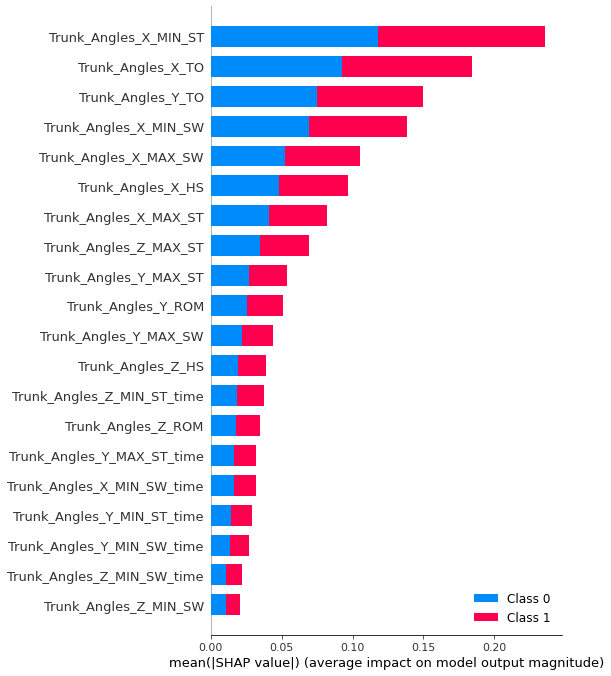

In [36]:
explainer = shap.KernelExplainer(model=svm.predict_proba,data=x_train,link="logit")
shap_values = explainer.shap_values(x_test) 
shap.summary_plot(shap_values, x_train, feature_names=result.columns, plot_type="bar")